# Importing Data to Dataframe

In [66]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
loc = 'C:\\Users\\Tathya05\\Downloads\\WWW_dstae00023177.dat'
df = pd.read_table(loc, delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,DST1001*01,X220,0,5,4,4,2,0,0,2,...,7.0,3.0,6.0,12,13.0,14,14.0,13,11.0,5.0
1,DST1001*02,X220,0,8,10,13,13,12,12,10,...,15.0,13.0,13.0,13,13.0,12,11.0,9,7.0,11.0
2,DST1001*03,X220,0,6,5,5,6,7,6,2,...,-2.0,-3.0,0.0,4,7.0,4,2.0,0,-3.0,0.0
3,DST1001*04,X220,0,-1,1,4,5,2,-2,-2,...,-4.0,-7.0,-4.0,-1,0.0,-1,2.0,1,-1.0,-2.0
4,DST1001*05,X220,0,0,1,5,4,4,3,4,...,-2.0,-4.0,-4.0,0,0.0,1,-1.0,-4,-6.0,0.0


# Cleaning and Implementing Features in the Dataset

In [67]:
df[['Year Month', 'Extra']] = df[0].str.split('*', expand=True)
df['Year'] = df['Year Month'].map(lambda x: '20'+x[3:5])
df['Month'] = df['Year Month'].map(lambda x: x[5:])
df['Day'] = df['Extra'].map(lambda x: x[:2])
df.rename(columns={ 2 : 'Base Value', 27 : 'Mean'}, inplace=True)
df = df.drop(df.columns[[0,1,2,28,29]], axis=1)
hour = []
for i in range(3,27):
    hour.append(i-2)
    df.rename(columns={ i : i-2}, inplace=True)
df['Max'] = df[hour].max(axis=1)
df['Min'] = df[hour].min(axis=1)
df['Month Max'] = df.groupby(['Year','Month'])['Max'].transform(max)
df['Month Min'] = df.groupby(['Year','Month'])['Min'].transform(min)
findex = df[['Year','Month','Day']].apply(pd.to_numeric)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,Mean,Year,Month,Day,Max,Min,Month Max,Month Min
0,5,4,4,2,0,0,2,2,2,0,...,13,11.0,5.0,2010,01,01,14.0,-1.0,15.0,-31.0
1,8,10,13,13,12,12,10,13,12,10,...,9,7.0,11.0,2010,01,02,15.0,7.0,15.0,-31.0
2,6,5,5,6,7,6,2,-3,-4,-2,...,0,-3.0,0.0,2010,01,03,7.0,-15.0,15.0,-31.0
3,-1,1,4,5,2,-2,-2,-4,-3,-2,...,1,-1.0,-2.0,2010,01,04,2.0,-7.0,15.0,-31.0
4,0,1,5,4,4,3,4,5,6,3,...,-4,-6.0,0.0,2010,01,05,5.0,-6.0,15.0,-31.0


# Taking User Input for Data Quering and Visualization

In [68]:
print("Enter the Starting Date e.g YYYY MM DD")
intial = list(map(int,input().split()))
print("Enter the Ending Date e.g YYYY MM DD")
ending = list(map(int,input().split()))

strt = findex.loc[(findex["Year"] == intial[0]) & (findex["Month"] == intial[1]) & (findex["Day"] == intial[2])].index
endd = findex.loc[(findex["Year"] == ending[0]) & (findex["Month"] == ending[1]) & (findex["Day"] == ending[2])].index

strt = strt[0]
endd = endd[0]


Enter the Starting Date e.g YYYY MM DD
2010 05 15
Enter the Ending Date e.g YYYY MM DD
2012 05 30


# Creating Copy of Dataset for querying

In [69]:
ndf = df[strt:endd]
ndf.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,Mean,Year,Month,Day,Max,Min,Month Max,Month Min
134,-1,-2,-5,-9,-11,-12,-11,-13,-13,-12,...,-8,-8.0,-9.0,2010,05,15,-6.0,-13.0,26.0,-80.0
135,-8,-4,-5,-5,-5,1,1,-2,-2,0,...,3,-1.0,0.0,2010,05,16,6.0,-2.0,26.0,-80.0
136,-4,-8,-8,-11,-13,-12,-12,-10,-9,-7,...,-8,-7.0,-8.0,2010,05,17,-1.0,-12.0,26.0,-80.0
137,-6,-9,-12,-13,-11,-9,-10,-17,-26,-31,...,-8,-8.0,-19.0,2010,05,18,-8.0,-34.0,26.0,-80.0
138,-5,-2,0,2,1,1,5,6,8,9,...,1,-6.0,5.0,2010,05,19,26.0,-6.0,26.0,-80.0


# Visualization of the Data according to Input

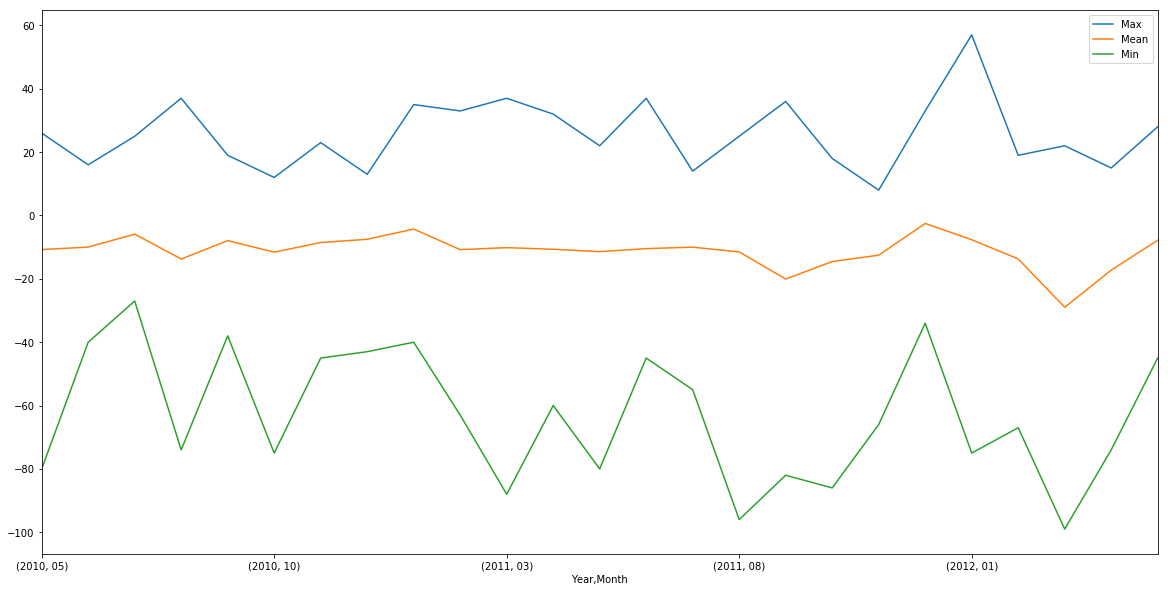

In [70]:
max_ym=ndf.groupby(['Year','Month'], sort=False)['Max'].max()
min_ym=ndf.groupby(['Year','Month'], sort=False)['Min'].min()
mean_ym=ndf.groupby(['Year','Month'], sort=False)['Mean'].mean()

max_ym=pd.DataFrame(max_ym)
min_ym=pd.DataFrame(min_ym)
mean_ym=pd.DataFrame(mean_ym)
analysis = pd.concat([max_ym, min_ym,mean_ym],join='outer',axis=1)
analysis.plot(y=['Max','Mean','Min'],figsize=(20,10))
